## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

## Define Dataset

In [2]:
df = pd.read_csv("breast-cancer.csv")
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

## Apply EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

One categorical column. (diagnosis) -> Needs encoding.

No null values. -> No need to impute any column.

In [4]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

#### Drop unuseful columns

In [6]:
df.drop('id', axis = 1, inplace = True)

#### Drop duplicates

In [7]:
df.duplicated().sum()

0

We don't have duplicates

#### Describe numerical columns

In [8]:
df.iloc[:, 0:11].describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  
count     569.000000              569.000000  
mean        0.181162                0.062798  
std         0.027414                0.007060  
min         0.106000                0.049960  
25%         0.161900                0.057700  
50%         0.179200                0.061540  
75%         0.195700                0.066120  
max         0.304000                0.097440

In [9]:
df.iloc[:, 11:21].describe()

radius_se  texture_se  perimeter_se     area_se  smoothness_se  \
count  569.000000  569.000000    569.000000  569.000000     569.000000   
mean     0.405172    1.216853      2.866059   40.337079       0.007041   
std      0.277313    0.551648      2.021855   45.491006       0.003003   
min      0.111500    0.360200      0.757000    6.802000       0.001713   
25%      0.232400    0.833900      1.606000   17.850000       0.005169   
50%      0.324200    1.108000      2.287000   24.530000       0.006380   
75%      0.478900    1.474000      3.357000   45.190000       0.008146   
max      2.873000    4.885000     21.980000  542.200000       0.031130   

       compactness_se  concavity_se  concave points_se  symmetry_se  \
count      569.000000    569.000000         569.000000   569.000000   
mean         0.025478      0.031894           0.011796     0.020542   
std          0.017908      0.030186           0.006170     0.008266   
min          0.002252      0.000000           0.000000     0.007882   
25%          0.013080      0.015090           0.007638     0.015160   
50%          0.020450      0.025890           0.010930     0.018730   
75%          0.032450      0.042050           0.014710     0.023480   
max          0.135400      0.396000           0.052790     0.078950   

       fractal_dimension_se  
count            569.000000  
mean               0.003795  
std                0.002646  
min                0.000895  
25%                0.002248  
50%                0.003187  
75%                0.004558  
max                0.029840

In [10]:
df.iloc[:, 21:].describe()

radius_worst  texture_worst  perimeter_worst   area_worst  \
count    569.000000     569.000000       569.000000   569.000000   
mean      16.269190      25.677223       107.261213   880.583128   
std        4.833242       6.146258        33.602542   569.356993   
min        7.930000      12.020000        50.410000   185.200000   
25%       13.010000      21.080000        84.110000   515.300000   
50%       14.970000      25.410000        97.660000   686.500000   
75%       18.790000      29.720000       125.400000  1084.000000   
max       36.040000      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500

No negative values.

Some columns have high variation, others have low variation.

## Apply Data Preprocessing

### Encode categorical columns

In [11]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

This is the target class:

M for Malignant

B for Benign

In [12]:
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

1 for Malignant


0 for Benign

### Drop the target column

In [13]:
data = df.drop('diagnosis', axis=1)

We need to drop the target column to see relation between features.

### Correlation

Correlation matrix describes the strength and the direction of the linear relationship between the features.

#### Correlation Matrix

In [14]:
corr_matrix = data.corr()
corr_matrix

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -0.097317      0.386358       -0.086761  -0.066280   
perimeter_se                0.674172      0.281673        0.693135   0.726628   
area_se                     0.735864      0.259845        0.744983   0.800086   
smoothness_se              -0.222600      0.006614       -0.202694  -0.166777   
compactness_se              0.206000      0.191975        0.250744   0.212583   
concavity_se                0.194204      0.143293        0.228082   0.207660   
concave points_se           0.376169      0.163851        0.407217   0.372320   
symmetry_se                -0.104321      0.009127       -0.081629  -0.072497   
fractal_dimension_se       -0.042641      0.054458       -0.005523  -0.019887   
radius_worst                0.969539      0.352573        0.969476   0.962746   
texture_worst               0.297008      0.912045        0.303038   0.287489   
perimeter_worst             0.965137      0.358040        0.970387   0.959120   
area_worst                  0.941082      0.343546        0.941550   0.959213   
smoothness_worst            0.119616      0.077503        0.150549   0.123523   
compactness_worst           0.413463      0.277830        0.455774   0.390410   
concavity_worst             0.526911      0.301025        0.563879   0.512606   
concave points_worst        0.744214      0.295316        0.771241   0.722017   
symmetry_worst              0.163953      0.105008        0.189115   0.143570   
fractal_dimension_worst     0.007066      0.119205        0.051019   0.003738   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.170581          0.506124        0.676764   
texture_mean                   -0.023389          0.236702        0.302418   
perimeter_mean                  0.207278          0.556936        0.716136   
area_mean                       0.177028          0.498502        0.685983   
smoothness_mean                 1.000000          0.659123        0.521984   
compactness_mean                0.659123          1.000000        0.883121   
concavity_mean                  0.521984          0.883121        1.000000   
concave points_mean             0.553695          0.831135        0.921391   
symmetry_mean                   0.557775          0.602641        0.500667   
fractal_dimension_mean          0.584792          0.565369        0.336783   
radius_se                       0.301467          0.497473        0.631925   
texture_se                      0.068406          0.046205        0.076218   
perimeter_se                    0.296092          0.548905        0.660391   
area_se                         0.246552          0.455653        0.617427   
smoothness_se                   0.332375          0.135299        0.098564   
compactness_se                  0.318943          0.738722        0.670279   
concavity_se                    0.248396          0.570517        0.691270   
concave points_se               0.380676          0.642262        0.683260   
symmetry_se                    

#### Plot correlation heatmap

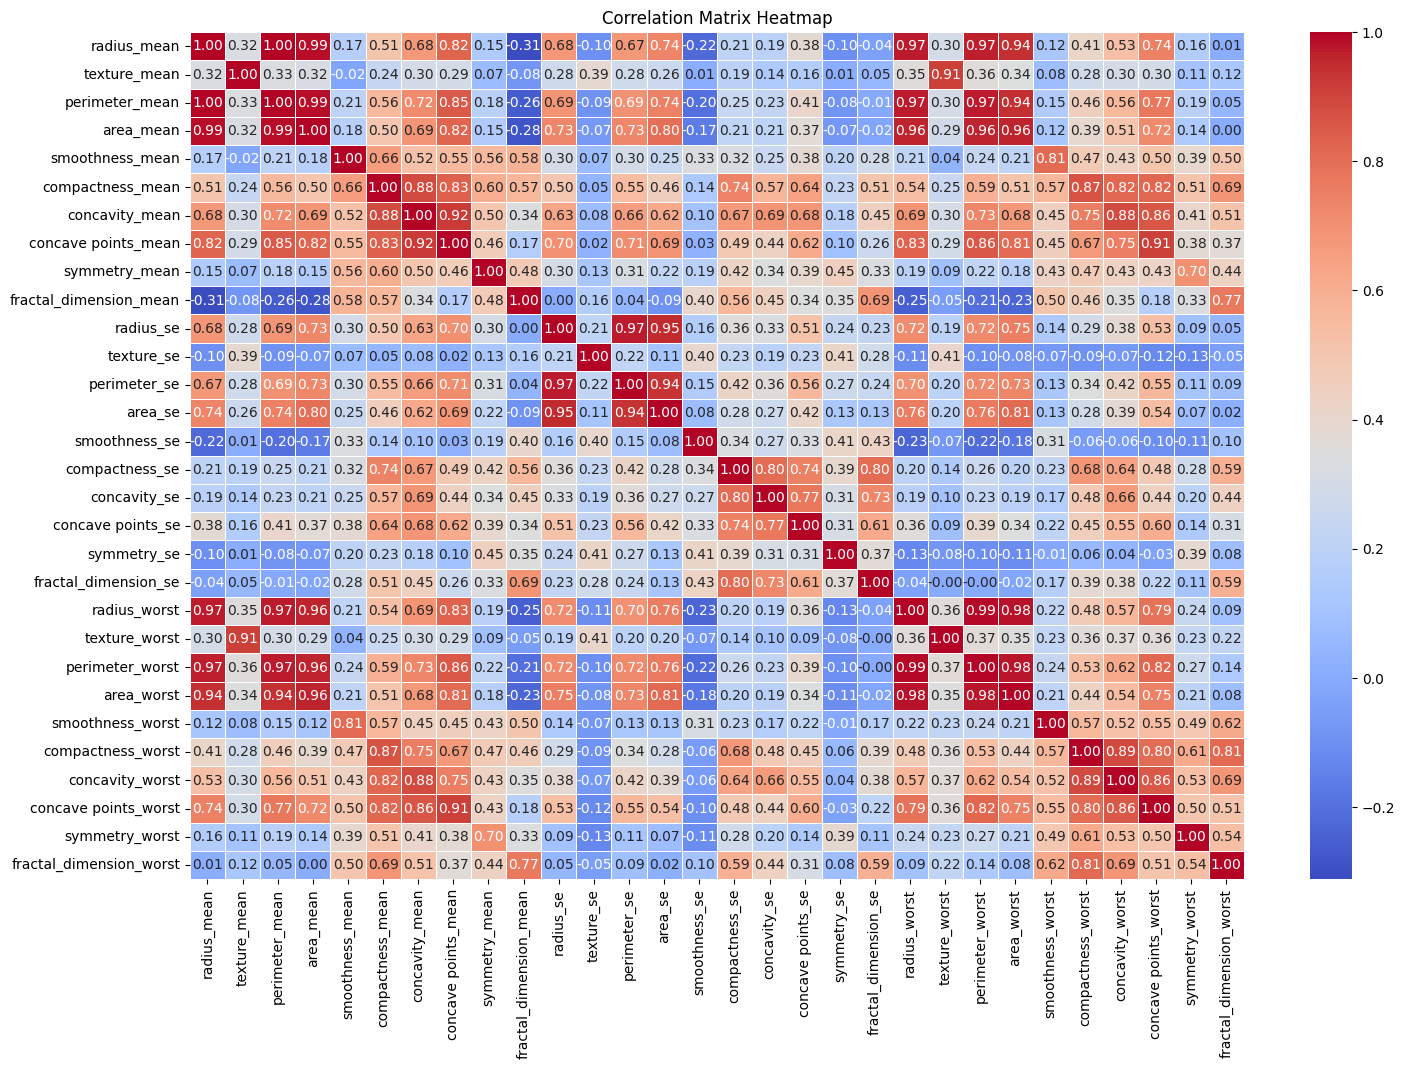

In [15]:
plt.figure(figsize=(17, 11))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

We can see high correlation between multiple features.

#### Find highly-correlated features

Between the two highly correlated features, we will drop the one with the higher average correlation to all other features.

In [16]:
# function to calc avg corr per feature:
n_features = len(corr_matrix)
def avg_corr(feature):
    sum = 0
    for col in data.columns:
        sum += abs(corr_matrix[feature][col])
    avg = sum / n_features
    return avg

let the threshold of high correlation be 0.8

In [17]:
threshold = 0.8
cols_to_drop = set()
for feature1 in corr_matrix.columns:
    for feature2 in corr_matrix.index:
        if feature1 == feature2:
            break

        corr_value = corr_matrix.loc[feature1, feature2]
        if abs(corr_value) > threshold:            
            if avg_corr(feature1) > avg_corr(feature2):
                cols_to_drop.add(feature1)
            else:
                cols_to_drop.add(feature2)

            print(f"corr({feature1}, {feature2}) = {corr_value:.2f}")

corr(perimeter_mean, radius_mean) = 1.00
corr(area_mean, radius_mean) = 0.99
corr(area_mean, perimeter_mean) = 0.99
corr(concavity_mean, compactness_mean) = 0.88
corr(concave points_mean, radius_mean) = 0.82
corr(concave points_mean, perimeter_mean) = 0.85
corr(concave points_mean, area_mean) = 0.82
corr(concave points_mean, compactness_mean) = 0.83
corr(concave points_mean, concavity_mean) = 0.92
corr(perimeter_se, radius_se) = 0.97
corr(area_se, area_mean) = 0.80
corr(area_se, radius_se) = 0.95
corr(area_se, perimeter_se) = 0.94
corr(concavity_se, compactness_se) = 0.80
corr(fractal_dimension_se, compactness_se) = 0.80
corr(radius_worst, radius_mean) = 0.97
corr(radius_worst, perimeter_mean) = 0.97
corr(radius_worst, area_mean) = 0.96
corr(radius_worst, concave points_mean) = 0.83
corr(texture_worst, texture_mean) = 0.91
corr(perimeter_worst, radius_mean) = 0.97
corr(perimeter_worst, perimeter_mean) = 0.97
corr(perimeter_worst, area_mean) = 0.96
corr(perimeter_worst, concave points_m

In [18]:
cols_to_drop

{'area_mean',
 'area_worst',
 'compactness_mean',
 'compactness_se',
 'compactness_worst',
 'concave points_mean',
 'concave points_worst',
 'concavity_mean',
 'concavity_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_mean',
 'radius_se',
 'radius_worst',
 'smoothness_mean',
 'texture_worst'}

These features that we will drop to reduce redundancy.

#### Drop highly-correlated features

In [19]:
data = data.drop(columns = cols_to_drop)
data

texture_mean  symmetry_mean  fractal_dimension_mean  texture_se  area_se  \
0           10.38         0.2419                 0.07871      0.9053   153.40   
1           17.77         0.1812                 0.05667      0.7339    74.08   
2           21.25         0.2069                 0.05999      0.7869    94.03   
3           20.38         0.2597                 0.09744      1.1560    27.23   
4           14.34         0.1809                 0.05883      0.7813    94.44   
..            ...            ...                     ...         ...      ...   
564         22.39         0.1726                 0.05623      1.2560   158.70   
565         28.25         0.1752                 0.05533      2.4630    99.04   
566         28.08         0.1590                 0.05648      1.0750    48.55   
567         29.33         0.2397                 0.07016      1.5950    86.22   
568         24.54         0.1587                 0.05884      1.4280    19.15   

     smoothness_se  concavity_se  concave points_se  symmetry_se  \
0         0.006399       0.05373            0.01587      0.03003   
1         0.005225       0.01860            0.01340      0.01389   
2         0.006150       0.03832            0.02058      0.02250   
3         0.009110       0.05661            0.01867      0.05963   
4         0.011490       0.05688            0.01885      0.01756   
..             ...           ...                ...          ...   
564       0.010300       0.05198            0.02454      0.01114   
565       0.005769       0.03950            0.01678      0.01898   
566       0.005903       0.04730            0.01557      0.01318   
567       0.006522       0.07117            0.01664      0.02324   
568       0.007189       0.00000            0.00000      0.02676   

     fractal_dimension_se  smoothness_worst  symmetry_worst  \
0                0.006193           0.16220          0.4601   
1                0.003532           0.12380          0.2750   
2                0.004571           0.14440          0.3613   
3                0.009208           0.20980          0.6638   
4                0.005115           0.13740          0.2364   
..                    ...               ...             ...   
564              0.004239           0.14100          0.2060   
565              0.002498           0.11660          0.2572   
566              0.003892           0.11390          0.2218   
567              0.006185           0.16500          0.4087   
568              0.002783           0.08996          0.2871   

     fractal_dimension_worst  
0                    0.11890  
1                    0.08902  
2                    0.08758  
3                    0.17300  
4                    0.07678  
..                       ...  
564                  0.07115  
565                  0.06637  
566                  0.07820  
567                  0.12400  
568                  0.07039  

[569 rows x 13 columns]

#### Plot new correlation heatmap 

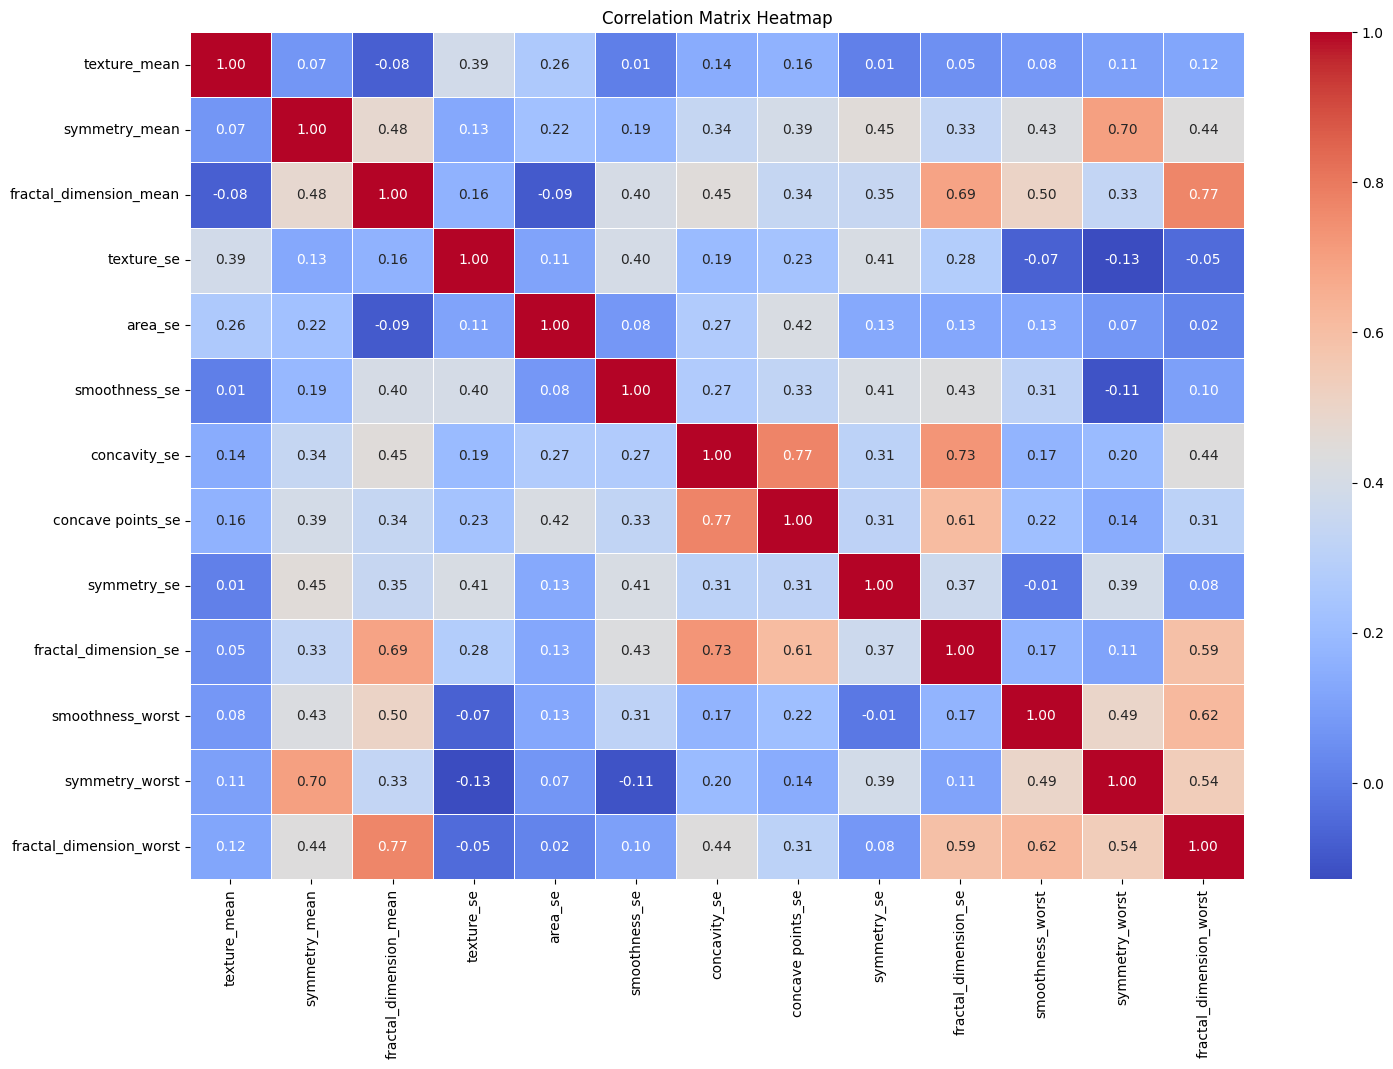

In [20]:
corr_matrix = data.corr()

plt.figure(figsize=(17, 11))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Describe remaining columns

In [21]:
data.describe()

texture_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
count    569.000000     569.000000              569.000000  569.000000   
mean      19.289649       0.181162                0.062798    1.216853   
std        4.301036       0.027414                0.007060    0.551648   
min        9.710000       0.106000                0.049960    0.360200   
25%       16.170000       0.161900                0.057700    0.833900   
50%       18.840000       0.179200                0.061540    1.108000   
75%       21.800000       0.195700                0.066120    1.474000   
max       39.280000       0.304000                0.097440    4.885000   

          area_se  smoothness_se  concavity_se  concave points_se  \
count  569.000000     569.000000    569.000000         569.000000   
mean    40.337079       0.007041      0.031894           0.011796   
std     45.491006       0.003003      0.030186           0.006170   
min      6.802000       0.001713      0.000000           0.000000   
25%     17.850000       0.005169      0.015090           0.007638   
50%     24.530000       0.006380      0.025890           0.010930   
75%     45.190000       0.008146      0.042050           0.014710   
max    542.200000       0.031130      0.396000           0.052790   

       symmetry_se  fractal_dimension_se  smoothness_worst  symmetry_worst  \
count   569.000000            569.000000        569.000000      569.000000   
mean      0.020542              0.003795          0.132369        0.290076   
std       0.008266              0.002646          0.022832        0.061867   
min       0.007882              0.000895          0.071170        0.156500   
25%       0.015160              0.002248          0.116600        0.250400   
50%       0.018730              0.003187          0.131300        0.282200   
75%       0.023480              0.004558          0.146000        0.317900   
max       0.078950              0.029840          0.222600        0.663800   

       fractal_dimension_worst  
count               569.000000  
mean                  0.083946  
std                   0.018061  
min                   0.055040  
25%                   0.071460  
50%                   0.080040  
75%                   0.092080  
max                   0.207500

### Outliers

#### Describe data before handling outliers

In [22]:
data.describe()

texture_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
count    569.000000     569.000000              569.000000  569.000000   
mean      19.289649       0.181162                0.062798    1.216853   
std        4.301036       0.027414                0.007060    0.551648   
min        9.710000       0.106000                0.049960    0.360200   
25%       16.170000       0.161900                0.057700    0.833900   
50%       18.840000       0.179200                0.061540    1.108000   
75%       21.800000       0.195700                0.066120    1.474000   
max       39.280000       0.304000                0.097440    4.885000   

          area_se  smoothness_se  concavity_se  concave points_se  \
count  569.000000     569.000000    569.000000         569.000000   
mean    40.337079       0.007041      0.031894           0.011796   
std     45.491006       0.003003      0.030186           0.006170   
min      6.802000       0.001713      0.000000           0.000000   
25%     17.850000       0.005169      0.015090           0.007638   
50%     24.530000       0.006380      0.025890           0.010930   
75%     45.190000       0.008146      0.042050           0.014710   
max    542.200000       0.031130      0.396000           0.052790   

       symmetry_se  fractal_dimension_se  smoothness_worst  symmetry_worst  \
count   569.000000            569.000000        569.000000      569.000000   
mean      0.020542              0.003795          0.132369        0.290076   
std       0.008266              0.002646          0.022832        0.061867   
min       0.007882              0.000895          0.071170        0.156500   
25%       0.015160              0.002248          0.116600        0.250400   
50%       0.018730              0.003187          0.131300        0.282200   
75%       0.023480              0.004558          0.146000        0.317900   
max       0.078950              0.029840          0.222600        0.663800   

       fractal_dimension_worst  
count               569.000000  
mean                  0.083946  
std                   0.018061  
min                   0.055040  
25%                   0.071460  
50%                   0.080040  
75%                   0.092080  
max                   0.207500

#### Scatter Plot

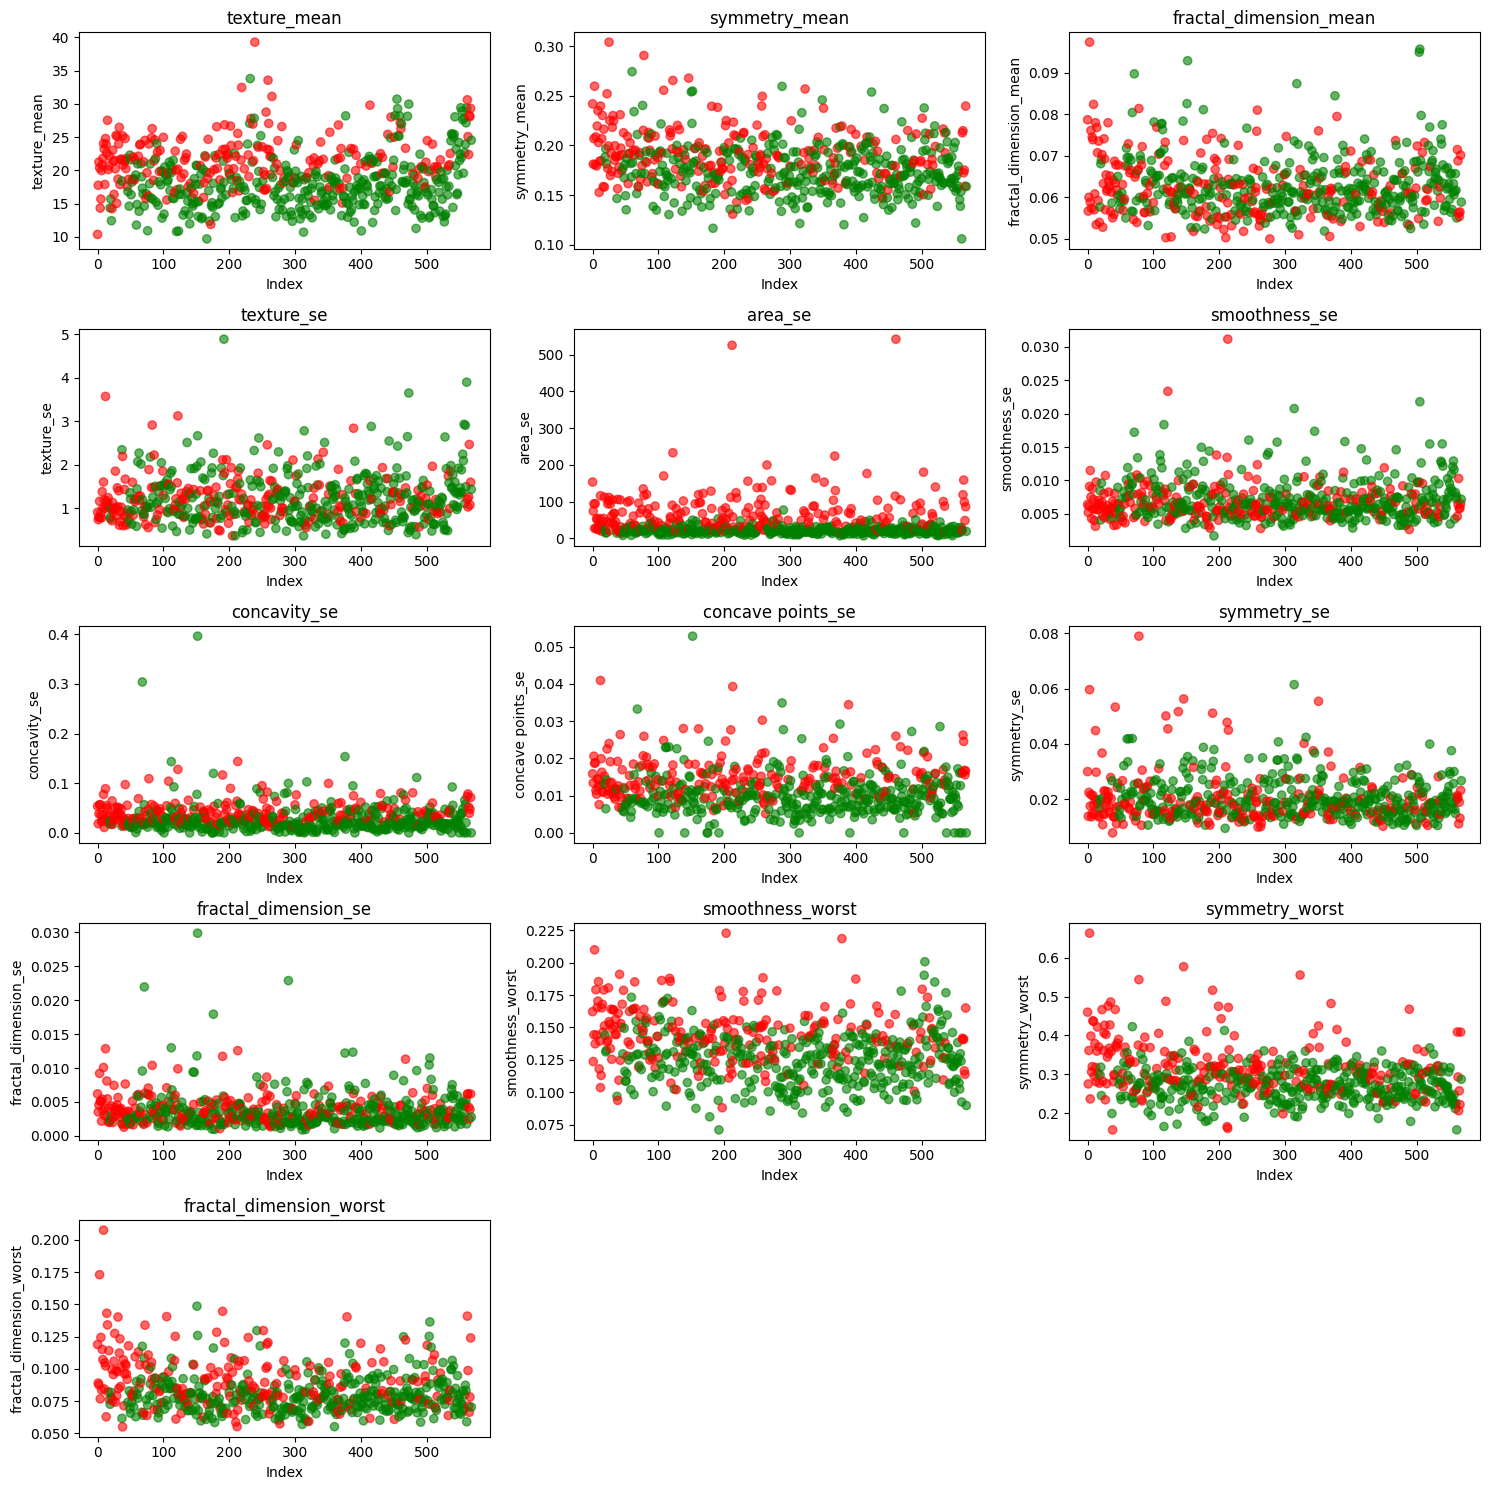

In [23]:
cols = 3
rows = int(np.ceil(len(data.columns) / cols))
fig = plt.figure(figsize=(15, rows * 3))

# Plot each feature
for i, feature in enumerate(data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    
    # Map target class (diagnosis) to colors: 0 -> green, 1 -> red
    colors = df['diagnosis'].map({0: 'green', 1: 'red'})
    
    ax.scatter(range(len(data[feature])), data[feature], c=colors, alpha=0.6)
    ax.set_title(feature)
    ax.set_xlabel('Index')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()

The data points are colored according to the target class (diagnosis):

Benign (0) is represented by green

Malignant (1) is represented by red

#### Detect & Handle Outliers

After getting the outliers, we mark them as NULL, to handle them as missing values.

In [24]:
for feature in data.columns:
    # Get outliers
    Q1 = data[feature].quantile(0.25)  
    Q3 = data[feature].quantile(0.75) 
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

    # Mark outliers as null
    data.loc[outliers.index, feature] = np.nan

    # Print outliers for each feature
    print(f"{outliers[feature].count()} outliers detected in '{feature}':")
    print(outliers[feature])
    print("-" * 50)

7 outliers detected in 'texture_mean':
219    32.47
232    33.81
239    39.28
259    33.56
265    31.12
455    30.72
562    30.62
Name: texture_mean, dtype: float64
--------------------------------------------------
15 outliers detected in 'symmetry_mean':
3      0.2597
22     0.2521
25     0.3040
60     0.2743
78     0.2906
108    0.2556
122    0.2655
146    0.2678
150    0.2540
152    0.2548
258    0.2495
288    0.2595
323    0.2569
424    0.2538
561    0.1060
Name: symmetry_mean, dtype: float64
--------------------------------------------------
15 outliers detected in 'fractal_dimension_mean':
3      0.09744
9      0.08243
68     0.08046
71     0.08980
78     0.08142
151    0.08261
152    0.09296
176    0.08116
258    0.08104
318    0.08743
376    0.08450
379    0.07950
504    0.09502
505    0.09575
507    0.07976
Name: fractal_dimension_mean, dtype: float64
--------------------------------------------------
20 outliers detected in 'texture_se':
12     3.568
83     2.910
122    3.12

In [25]:
data.isnull().sum()

texture_mean                7
symmetry_mean              15
fractal_dimension_mean     15
texture_se                 20
area_se                    65
smoothness_se              30
concavity_se               22
concave points_se          19
symmetry_se                27
fractal_dimension_se       28
smoothness_worst            7
symmetry_worst             23
fractal_dimension_worst    24
dtype: int64

These are the detected outliers, they are replace by NaN.

area_se has most outliers. About 11% of its values are outliers.

#### Describe data after removing outliers

In [26]:
data.describe()

texture_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
count    562.000000     554.000000              554.000000  549.000000   
mean      19.117847       0.179200                0.062167    1.153027   
std        4.028416       0.024035                0.005920    0.431877   
min        9.710000       0.116700                0.049960    0.360200   
25%       16.162500       0.161825                0.057645    0.828000   
50%       18.785000       0.178300                0.061325    1.075000   
75%       21.660000       0.194575                0.065755    1.430000   
max       29.970000       0.245900                0.078710    2.426000   

          area_se  smoothness_se  concavity_se  concave points_se  \
count  504.000000     539.000000    547.000000         550.000000   
mean    28.351087       0.006556      0.027929           0.011128   
std     16.835858       0.002048      0.018033           0.004940   
min      6.802000       0.001713      0.000000           0.000000   
25%     17.257500       0.005057      0.014550           0.007541   
50%     22.790000       0.006175      0.024430           0.010700   
75%     33.912500       0.007820      0.039145           0.014232   
max     83.500000       0.012430      0.082320           0.025270   

       symmetry_se  fractal_dimension_se  smoothness_worst  symmetry_worst  \
count   542.000000            541.000000        562.000000      546.000000   
mean      0.019254              0.003362          0.131698        0.282075   
std       0.005664              0.001504          0.021493        0.047575   
min       0.007882              0.000895          0.081250        0.156500   
25%       0.014958              0.002205          0.116600        0.248050   
50%       0.018435              0.003040          0.131200        0.279750   
75%       0.022433              0.004239          0.145275        0.312125   
max       0.035460              0.008015          0.188300        0.415400   

       fractal_dimension_worst  
count               545.000000  
mean                  0.081596  
std                   0.013950  
min                   0.055040  
25%                   0.070970  
50%                   0.079190  
75%                   0.090260  
max                   0.122400

#### Use KNN-Imputer to impute missing values (outliers)

Give uniform weights to treat all neighbors with equal importance.

In [27]:
imputer = KNNImputer(weights = 'uniform')
data[data.columns] = imputer.fit_transform(data[data.columns])

In [28]:
data

texture_mean  symmetry_mean  fractal_dimension_mean  texture_se  area_se  \
0           10.38        0.24190                0.078710     0.90530   27.562   
1           17.77        0.18120                0.056670     0.73390   74.080   
2           21.25        0.20690                0.059990     0.78690   30.448   
3           20.38        0.18408                0.060906     1.15600   27.230   
4           14.34        0.18090                0.058830     0.78130   28.648   
..            ...            ...                     ...         ...      ...   
564         22.39        0.17260                0.056230     1.25600   19.094   
565         28.25        0.17520                0.055330     1.42922   20.902   
566         28.08        0.15900                0.056480     1.07500   48.550   
567         29.33        0.23970                0.070160     1.59500   20.540   
568         24.54        0.15870                0.058840     1.42800   19.150   

     smoothness_se  concavity_se  concave points_se  symmetry_se  \
0         0.006399       0.05373            0.01587     0.030030   
1         0.005225       0.01860            0.01340     0.013890   
2         0.006150       0.03832            0.02058     0.022500   
3         0.009110       0.05661            0.01867     0.019032   
4         0.011490       0.05688            0.01885     0.017560   
..             ...           ...                ...          ...   
564       0.010300       0.05198            0.02454     0.011140   
565       0.005769       0.03950            0.01678     0.018980   
566       0.005903       0.04730            0.01557     0.013180   
567       0.006522       0.07117            0.01664     0.023240   
568       0.007189       0.00000            0.00000     0.026760   

     fractal_dimension_se  smoothness_worst  symmetry_worst  \
0                0.006193           0.16220         0.32112   
1                0.003532           0.12380         0.27500   
2                0.004571           0.14440         0.36130   
3                0.003428           0.14364         0.28424   
4                0.005115           0.13740         0.23640   
..                    ...               ...             ...   
564              0.004239           0.14100         0.20600   
565              0.002498           0.11660         0.25720   
566              0.003892           0.11390         0.22180   
567              0.006185           0.16500         0.40870   
568              0.002783           0.08996         0.28710   

     fractal_dimension_worst  
0                   0.118900  
1                   0.089020  
2                   0.087580  
3                   0.078228  
4                   0.076780  
..                       ...  
564                 0.071150  
565                 0.066370  
566                 0.078200  
567                 0.070964  
568                 0.070390  

[569 rows x 13 columns]

#### Describe data after handling outliers

In [29]:
data.describe()

texture_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
count    569.000000     569.000000              569.000000  569.000000   
mean      19.148172       0.179251                0.062107    1.158937   
std        4.016242       0.023750                0.005867    0.426336   
min        9.710000       0.116700                0.049960    0.360200   
25%       16.170000       0.162000                0.057660    0.833900   
50%       18.840000       0.178400                0.061290    1.095000   
75%       21.680000       0.194300                0.065700    1.428000   
max       29.970000       0.245900                0.078710    2.426000   

          area_se  smoothness_se  concavity_se  concave points_se  \
count  569.000000     569.000000    569.000000         569.000000   
mean    28.511703       0.006539      0.028244           0.011195   
std     16.103106       0.002003      0.017852           0.004887   
min      6.802000       0.001713      0.000000           0.000000   
25%     17.740000       0.005133      0.015090           0.007638   
50%     23.310000       0.006181      0.025750           0.010870   
75%     34.440000       0.007762      0.039302           0.014320   
max     83.500000       0.012430      0.082320           0.025270   

       symmetry_se  fractal_dimension_se  smoothness_worst  symmetry_worst  \
count   569.000000            569.000000        569.000000      569.000000   
mean      0.019213              0.003362          0.131755        0.282527   
std       0.005554              0.001471          0.021388        0.046802   
min       0.007882              0.000895          0.081250        0.156500   
25%       0.015030              0.002234          0.116600        0.250400   
50%       0.018430              0.003100          0.131300        0.280700   
75%       0.022070              0.004205          0.145100        0.311300   
max       0.035460              0.008015          0.188300        0.415400   

       fractal_dimension_worst  
count               569.000000  
mean                  0.081595  
std                   0.013721  
min                   0.055040  
25%                   0.071270  
50%                   0.079200  
75%                   0.089990  
max                   0.122400

#### Scatter Plot after handling outliers

In [30]:
int(np.ceil(len(data.columns)))

13

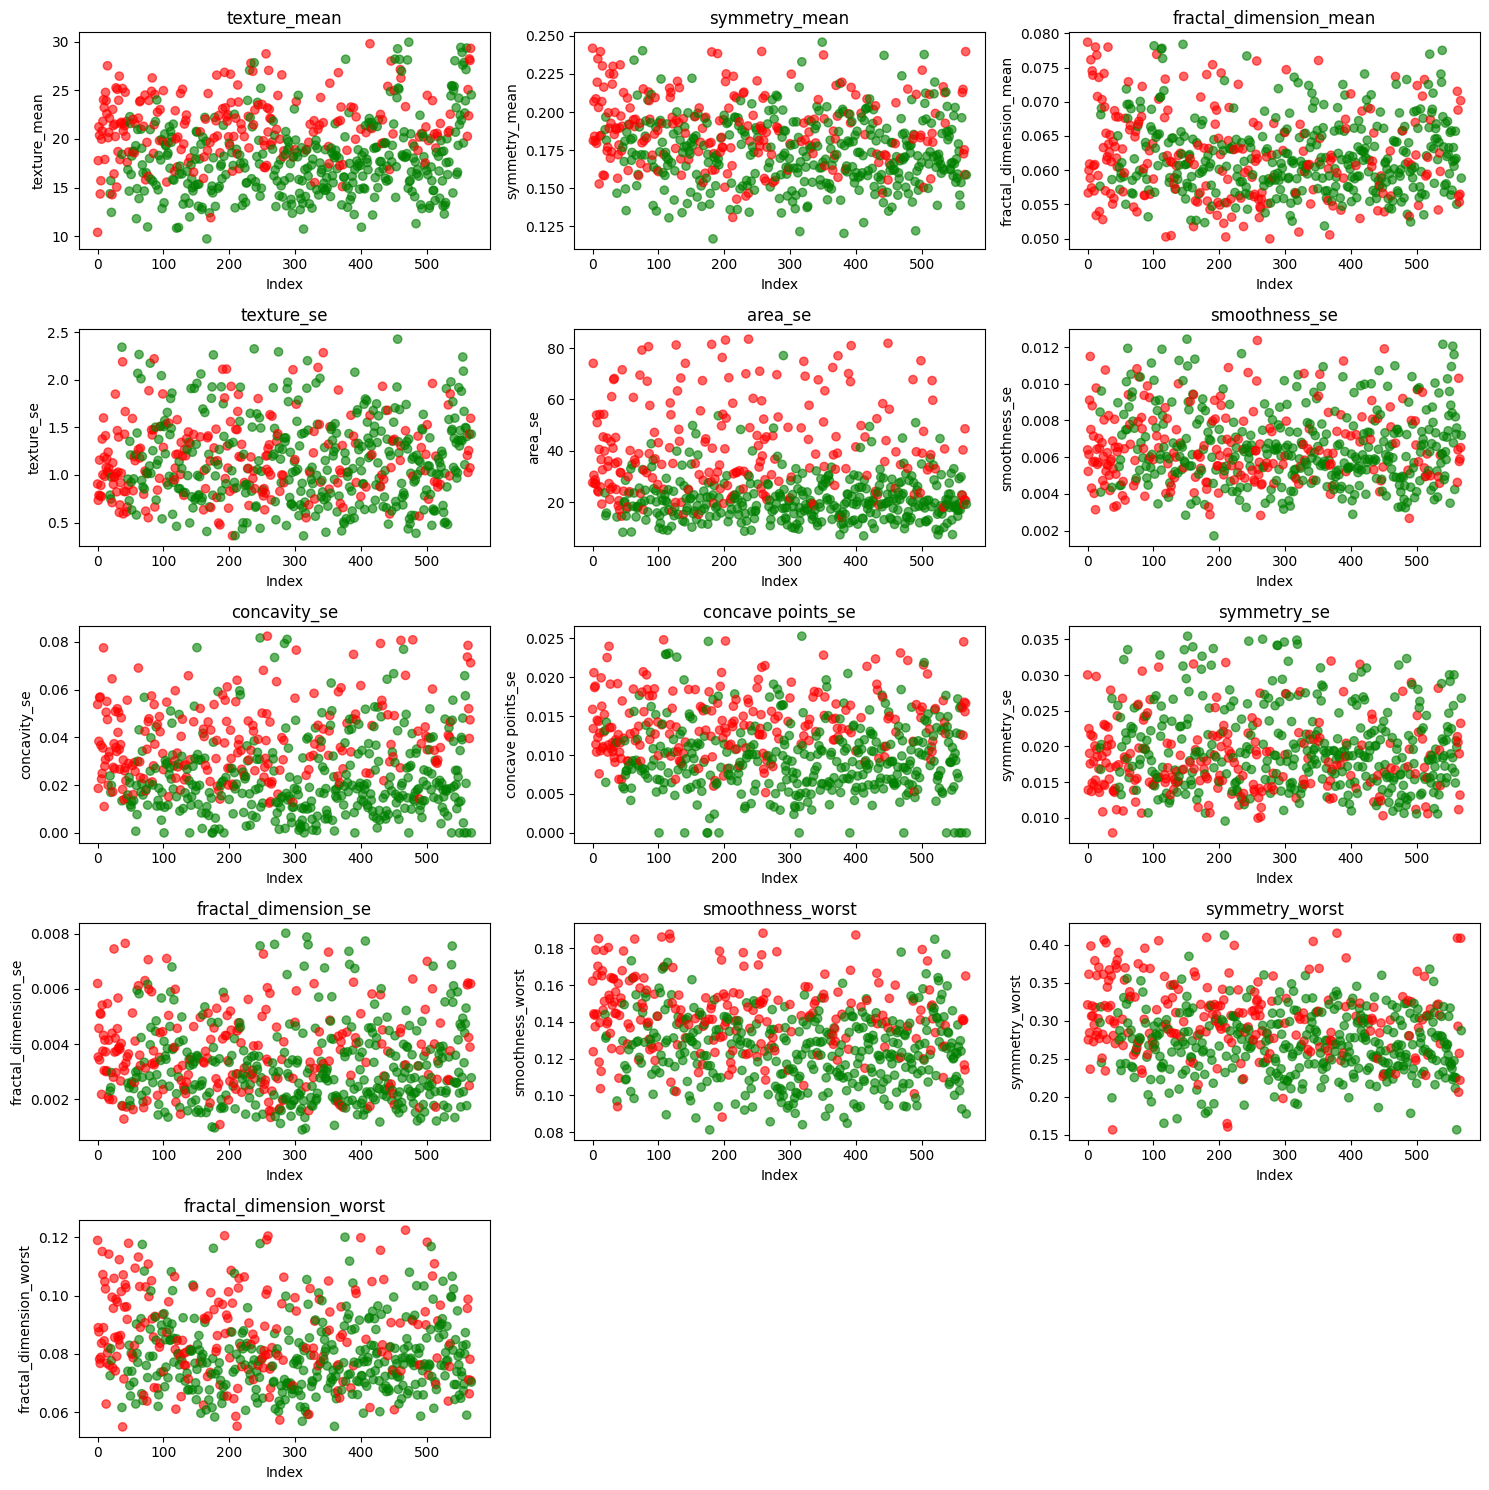

In [31]:
cols = 3
rows = int(np.ceil(len(data.columns) / cols))
fig = plt.figure(figsize=(15, rows * 3))

for i, feature in enumerate(data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    
    # Map target class (diagnosis) to colors: 0 -> green, 1 -> red
    colors = df['diagnosis'].map({0: 'green', 1: 'red'})
    
    ax.scatter(range(len(data[feature])), data[feature], c=colors, alpha=0.6)
    ax.set_title(feature)
    ax.set_xlabel('Index')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()

### Get target column back to the dataframe

In [32]:
data

texture_mean  symmetry_mean  fractal_dimension_mean  texture_se  area_se  \
0           10.38        0.24190                0.078710     0.90530   27.562   
1           17.77        0.18120                0.056670     0.73390   74.080   
2           21.25        0.20690                0.059990     0.78690   30.448   
3           20.38        0.18408                0.060906     1.15600   27.230   
4           14.34        0.18090                0.058830     0.78130   28.648   
..            ...            ...                     ...         ...      ...   
564         22.39        0.17260                0.056230     1.25600   19.094   
565         28.25        0.17520                0.055330     1.42922   20.902   
566         28.08        0.15900                0.056480     1.07500   48.550   
567         29.33        0.23970                0.070160     1.59500   20.540   
568         24.54        0.15870                0.058840     1.42800   19.150   

     smoothness_se  concavity_se  concave points_se  symmetry_se  \
0         0.006399       0.05373            0.01587     0.030030   
1         0.005225       0.01860            0.01340     0.013890   
2         0.006150       0.03832            0.02058     0.022500   
3         0.009110       0.05661            0.01867     0.019032   
4         0.011490       0.05688            0.01885     0.017560   
..             ...           ...                ...          ...   
564       0.010300       0.05198            0.02454     0.011140   
565       0.005769       0.03950            0.01678     0.018980   
566       0.005903       0.04730            0.01557     0.013180   
567       0.006522       0.07117            0.01664     0.023240   
568       0.007189       0.00000            0.00000     0.026760   

     fractal_dimension_se  smoothness_worst  symmetry_worst  \
0                0.006193           0.16220         0.32112   
1                0.003532           0.12380         0.27500   
2                0.004571           0.14440         0.36130   
3                0.003428           0.14364         0.28424   
4                0.005115           0.13740         0.23640   
..                    ...               ...             ...   
564              0.004239           0.14100         0.20600   
565              0.002498           0.11660         0.25720   
566              0.003892           0.11390         0.22180   
567              0.006185           0.16500         0.40870   
568              0.002783           0.08996         0.28710   

     fractal_dimension_worst  
0                   0.118900  
1                   0.089020  
2                   0.087580  
3                   0.078228  
4                   0.076780  
..                       ...  
564                 0.071150  
565                 0.066370  
566                 0.078200  
567                 0.070964  
568                 0.070390  

[569 rows x 13 columns]

In [33]:
data['diagnosis'] = df['diagnosis']
data

texture_mean  symmetry_mean  fractal_dimension_mean  texture_se  area_se  \
0           10.38        0.24190                0.078710     0.90530   27.562   
1           17.77        0.18120                0.056670     0.73390   74.080   
2           21.25        0.20690                0.059990     0.78690   30.448   
3           20.38        0.18408                0.060906     1.15600   27.230   
4           14.34        0.18090                0.058830     0.78130   28.648   
..            ...            ...                     ...         ...      ...   
564         22.39        0.17260                0.056230     1.25600   19.094   
565         28.25        0.17520                0.055330     1.42922   20.902   
566         28.08        0.15900                0.056480     1.07500   48.550   
567         29.33        0.23970                0.070160     1.59500   20.540   
568         24.54        0.15870                0.058840     1.42800   19.150   

     smoothness_se  concavity_se  concave points_se  symmetry_se  \
0         0.006399       0.05373            0.01587     0.030030   
1         0.005225       0.01860            0.01340     0.013890   
2         0.006150       0.03832            0.02058     0.022500   
3         0.009110       0.05661            0.01867     0.019032   
4         0.011490       0.05688            0.01885     0.017560   
..             ...           ...                ...          ...   
564       0.010300       0.05198            0.02454     0.011140   
565       0.005769       0.03950            0.01678     0.018980   
566       0.005903       0.04730            0.01557     0.013180   
567       0.006522       0.07117            0.01664     0.023240   
568       0.007189       0.00000            0.00000     0.026760   

     fractal_dimension_se  smoothness_worst  symmetry_worst  \
0                0.006193           0.16220         0.32112   
1                0.003532           0.12380         0.27500   
2                0.004571           0.14440         0.36130   
3                0.003428           0.14364         0.28424   
4                0.005115           0.13740         0.23640   
..                    ...               ...             ...   
564              0.004239           0.14100         0.20600   
565              0.002498           0.11660         0.25720   
566              0.003892           0.11390         0.22180   
567              0.006185           0.16500         0.40870   
568              0.002783           0.08996         0.28710   

     fractal_dimension_worst  diagnosis  
0                   0.118900          1  
1                   0.089020          1  
2                   0.087580          1  
3                   0.078228          1  
4                   0.076780          1  
..                       ...        ...  
564                 0.071150          1  
565                 0.066370          1  
566                 0.078200          1  
567                 0.070964          1  
568                 0.070390          0  

[569 rows x 14 columns]

## Save Preprocessed Data to CSV File

In [34]:
data.to_csv("breast-cancer_cleaned.csv", index=False)